In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()
import warnings
warnings.filterwarnings("ignore")


In [13]:
rand_state = 1000

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/PJalgotrader/ML-USU-SP21/main/Classes/Class%209-%20Regularization%20(Python)/Regularization_synthetic.csv")
df

,X1,X2,X3,X4,X5,y
0,1.668068,2.782452,4.641320,7.742038e+00,1.291425e+01,-3.901562
1,0.925862,0.857220,0.793667,7.348263e-01,6.803476e-01,-0.384578
2,1.057997,1.119357,1.184276,1.252960e+00,1.325628e+00,12.493677
3,-0.920339,0.847024,-0.779549,7.174495e-01,-6.602968e-01,12.237389
4,1.299748,1.689346,2.195725,2.853890e+00,3.709339e+00,-3.772851
...,...,...,...,...,...,...
95,-0.230239,0.053010,-0.012205,2.810058e-03,-6.469850e-04,-16.638437
96,-0.013516,0.000183,-0.000002,3.340000e-08,-4.510000e-10,-15.068184
97,-0.490594,0.240682,-0.118077,5.792806e-02,-2.841916e-02,-9.487845
98,0.156247,0.024413,0.003814,5.959960e-04,9.310000e-05,8.861043


In [11]:
df.head()

,X1,X2,X3,X4,X5,y
0,1.668068,2.782452,4.641320,7.742038,12.914249,-3.901562
1,0.925862,0.857220,0.793667,0.734826,0.680348,-0.384578
2,1.057997,1.119357,1.184276,1.252960,1.325628,12.493677
3,-0.920339,0.847024,-0.779549,0.717449,-0.660297,12.237389
4,1.299748,1.689346,2.195725,2.853890,3.709339,-3.772851


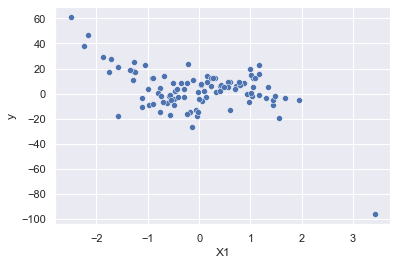

In [14]:
sns.scatterplot(x="X1", y="y", data=df)
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()
df_sc = scaler.fit_transform(df)
df_sc[0]

array([ 1.68559489,  1.10379599,  0.93969261,  0.28529469,  0.20893775,
       -0.41160092])

In [18]:
df.describe()

,X1,X2,X3,X4,X5,y
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,100.000000
mean,-0.045528,1.035573,0.028803,3.577067e+00,2.649662e+00,3.163589
std,1.021734,1.590583,4.933266,1.467239e+01,4.937498e+01,17.251525
min,-2.502813,0.000077,-15.677801,5.990000e-09,-9.820688e+01,-96.615135
25%,-0.715772,0.106957,-0.367584,1.146202e-02,-1.894007e-01,-4.740569
50%,-0.056092,0.513483,-0.000186,2.639740e-01,-6.630000e-07,3.535766
75%,0.708103,1.265628,0.355353,1.605267e+00,1.785395e-01,12.250487
max,3.428563,11.755044,40.302907,1.381811e+02,4.737624e+02,61.375324


In [19]:
df_sc = pd.DataFrame(df_sc, columns= df.columns)
df_sc.head()

,X1,X2,X3,X4,X5,y
0,1.685595,1.103796,0.939693,0.285295,0.208938,-0.411601
1,0.955517,-0.112695,0.155823,-0.194689,-0.040086,-0.206709
2,1.085492,0.052941,0.235401,-0.159198,-0.026951,0.543551
3,-0.860516,-0.119138,-0.164683,-0.195880,-0.067375,0.528621
4,1.323294,0.413098,0.441460,-0.049537,0.021570,-0.404102


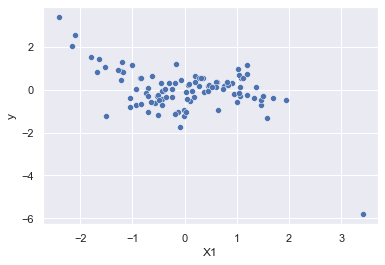

In [20]:
sns.scatterplot(x="X1", y="y", data=df_sc)
plt.show()

In [26]:
y = df_sc["y"]
X = df_sc.drop("y", axis =1, inplace=False)


from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X,y, test_size = 0.2, random_state= rand_state)
X_train.head()


,X1,X2,X3,X4,X5
37,1.464631,0.662152,0.606819,0.052327,0.073610
44,1.572794,0.870372,0.757779,0.153824,0.130178
55,0.275319,-0.619639,-0.003245,-0.244817,-0.053920
66,-0.493702,-0.464986,-0.039290,-0.238872,-0.054935
82,0.272588,-0.620456,-0.003337,-0.244827,-0.053921


In [33]:
X_test_wc = sm.add_constant(X_test)
X_train_wc = sm.add_constant(X_train)

In [32]:
model = sm.OLS(y_train, X_train_wc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.451
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     12.17
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           1.28e-08
Time:                        16:19:35   Log-Likelihood:                -65.981
No. Observations:                  80   AIC:                             144.0
Df Residuals:                      74   BIC:                             158.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0870      0.173      0.504      0.616      -0.257       0.431
X1             0.5370      0.199      2.705      0.008       0.141       0.933
X2             0.1037      0.302      0.343      0.732      -0.498       0.705
X3            -2.1339      0.839     -2.543      0.013      -3.806      -0.462
X4             0.2535      0.861      0.294      0.769      -1.463       1.970
X5             1.5933      1.669      0.954      0.343      -1.733       4.920
==============================================================================
Omnibus:                       11.757   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.171
Skew:                          -0.701   Prob(JB):                     0.000837
Kurtosis:                       4.512   Cond. No.                         33.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [40]:
model_linear = LinearRegression()
model_ridge = Ridge(alpha=0)
model_lasso = Lasso(alpha=0)
model_net = ElasticNet(alpha=0)


In [41]:
y_hat_linear = model_linear.fit(X_train, y_train).predict(X_test)
y_hat_ridge = model_ridge.fit(X_train, y_train).predict(X_test)
y_hat_lasso = model_lasso.fit(X_train, y_train).predict(X_test)
y_hat_net = model_net.fit(X_train, y_train).predict(X_test)

In [42]:
df_predictions = pd.DataFrame({"y_test" : y_test,
                                "y_hat_linear" : y_hat_linear,
                                "y_hat_ridge" : y_hat_ridge,
                                "y_hat_lasso" : y_hat_lasso,
                                "y_hat_net" : y_hat_net})



df_predictions.head()

,y_test,y_hat_linear,y_hat_ridge,y_hat_lasso,y_hat_net
88,1.307243,0.171067,0.171067,0.171067,0.171067
4,-0.404102,-0.079686,-0.079686,-0.079686,-0.079686
62,-1.055680,-0.180921,-0.180921,-0.180921,-0.180921
63,2.538916,2.344482,2.344482,2.344482,2.344482
48,1.144605,-0.078630,-0.078630,-0.078630,-0.078630


# COEFIICIENTS

In [43]:
df.drop("y" , axis=1, inplace=False).columns

Index(['X1', 'X2', 'X3', 'X4', 'X5'], dtype='object')

In [45]:
coefficients = pd.DataFrame({"Features" : df.drop("y", axis=1, inplace=False).columns})
coefficients["model_lin"]= model_linear.coef_
coefficients["model_ridge"]= model_ridge.coef_
coefficients["model_lasoo"]=model_lasso.coef_
coefficients["model_net"]= model_net.coef_
coefficients

,Features,model_lin,model_ridge,model_lasoo,model_net
0,X1,0.537047,0.537047,0.537047,0.537047
1,X2,0.103655,0.103655,0.103655,0.103655
2,X3,-2.133872,-2.133872,-2.133872,-2.133872
3,X4,0.253492,0.253492,0.253492,0.253492
4,X5,1.593336,1.593336,1.593336,1.593336


# PERFORMANCE IN THE TEST SET

In [46]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_linear"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

2.037

In [47]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_ridge"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

2.037

In [48]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_lasso"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

2.037

In [49]:
MSE_test = np.mean(np.square(df_predictions["y_test"] - df_predictions["y_hat_net"]))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test, 3)

2.037

In [ ]:
## I took same results because of the alpha is 0 all of them

## PLOTTING THE REGRESSION COEFFICIENTS VS ALPHAS:

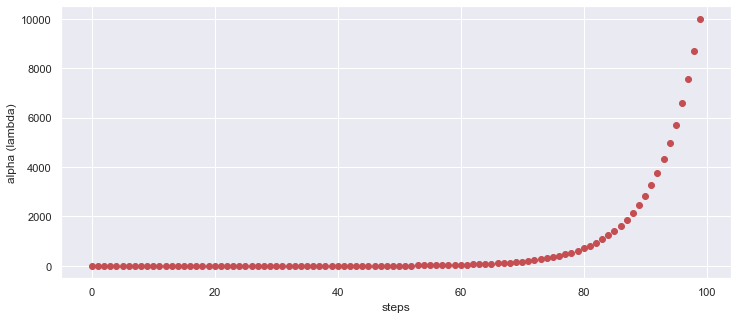

In [50]:
# 1-) RIDGE REGRESSION CEOFFICIENT VS ALPHA


alpha_ridge = 10**np.linspace(-2,4,100)
plt.figure(figsize=(12,5))
plt.plot(alpha_ridge, "or")
plt.xlabel("steps")
plt.ylabel("alpha (lambda)")
plt.show()


In [52]:
ridge = Ridge()
coefs_ridge = []


for i in alpha_ridge:
    ridge.set_params(alpha = i)
    ridge.fit(X_train, y_train)
    coefs_ridge.append(ridge.coef_)

np.shape(coefs_ridge)


(100, 5)